In [127]:
from scipy import optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymoo.core.problem import Problem
#from matplotlib.pyplot import MultipleLocator

# result1

In [2]:
(70-1.7)/132*24322000

12584792.424242426

In [3]:
(70-0.6)/121*26134000

14989252.892561983

In [4]:
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        #self.cost_matrix = cost_matrix
        super().__init__(n_var=14,   # 变量数
                         n_obj=2,   # 目标数
                         n_constr=7,    # 约束数
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     # 变量下界
                         xu=np.array([12584792,12584792,12584792,12584792,12584792,12584792,12584792,14989252,14989252,14989252,14989252,14989252,14989252,14989252]),   # 变量上界
                         )

    def _evaluate(self, x, out, *args, **kwargs):

        # 定义目标函数
        
        P=70
        M=70
        N=160
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*2/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*0.36-x[:, 13]*(0.3*M+12.8)*0.36
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7*N)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6*N)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6*N)-x[:, 12]*(0.3*P+12.5)/(10**8*N)-x[:, 13]*(0.3*M+12.8)/(10**8*N)
        #f3= 13690337-x[:, 0]--x[:, 1]
        #f4= 14125319-x[:, 2]--x[:, 3]
        # 定义约束条件
        g1 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]-1.6*10**5*belta*N
        g2 = x[:, 12]*1.2*10**7*(0.3*P+12.5)+x[:, 13]*1.2*10**7*(0.3*M+12.8)-1.2*10**15*N
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = 0.6*x[:, 13]-4.1*10**3*N
        # todo
        out["F"] = np.column_stack([f1, f2])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7])

In [5]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
#from example import MyProblem

# 定义遗传算法
algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=25),
    mutation=get_mutation("real_pm", eta=18),
    eliminate_duplicates=True
)

In [7]:
res = minimize(MyProblem(),
               algorithm,
               seed=1,
               termination=('n_gen', 1000))
print(70,70,res.X[:1])

70 70 [[  16253.67860597    8591.76720744 4079927.78648587  260058.0730405
  2023802.06476962 1098857.97905643   15918.70749033   11776.20676192
  4782379.6329368  3592545.3803119   128475.07480737 1639003.41285541
  2395563.16183361 1049359.05700577]]


In [14]:
answer=list(res.X[:1].squeeze())
answer

[16253.678605971645,
 8591.767207444613,
 4079927.7864858713,
 260058.0730405047,
 2023802.064769625,
 1098857.979056428,
 15918.707490327912,
 11776.20676191554,
 4782379.632936802,
 3592545.380311899,
 128475.07480736649,
 1639003.412855412,
 2395563.1618336095,
 1049359.0570057721]

C:\Users\hwq\AppData\Local\Temp/ipykernel_19060/899777000.py:33: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1e+07)


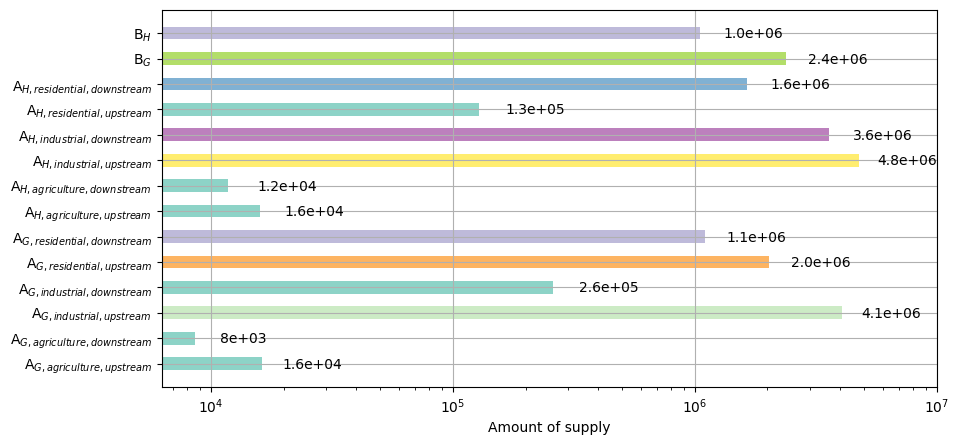

In [72]:
plt.figure(dpi=100,figsize=(10,5))
y=np.arange(1,15)
x=answer
str1=['A$_{G,agriculture,upstream}$','A$_{G,agriculture,downstream}$', 'A$_{G,industrial,upstream}$','A$_{G,industrial,downstream}$','A$_{G,residential,upstream}$', 'A$_{G,residential,downstream}$','A$_{H,agriculture,upstream}$','A$_{H,agriculture,downstream}$', 'A$_{H,industrial,upstream}$','A$_{H,industrial,downstream}$','A$_{H,residential,upstream}$', 'A$_{H,residential,downstream}$',  'B$_{G}$', 'B$_{H}$']

plt.xscale('log')

data_color = answer

data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('Set3')

colors = my_cmap(data_color)

rects1 = plt.bar(x=0, bottom=y, color=colors,height=0.5,width=x,orientation="horizontal",tick_label=str1)

plt.text(answer[0]+0.1e+05, 1-0.3 , '1.6e+04', ha='center', va='bottom', fontsize=10)
plt.text(answer[1]+0.5e+04, 2-0.3 , '8e+03', ha='center', va='bottom', fontsize=10)
plt.text(answer[2]+2.4e+06, 3-0.3 , '4.1e+06', ha='center', va='bottom', fontsize=10)
plt.text(answer[3]+1.8e+05, 4-0.3 , '2.6e+05', ha='center', va='bottom', fontsize=10)
plt.text(answer[4]+1.3e+06, 5-0.3 , '2.0e+06', ha='center', va='bottom', fontsize=10)
plt.text(answer[5]+0.7e+06, 6-0.3 , '1.1e+06', ha='center', va='bottom', fontsize=10)
plt.text(answer[6]+1.1e+04, 7-0.3 , '1.6e+04', ha='center', va='bottom', fontsize=10)
plt.text(answer[7]+0.9e+04, 8-0.3 , '1.2e+04', ha='center', va='bottom', fontsize=10)
plt.text(answer[8]+2.8e+06, 9-0.3 , '4.8e+06', ha='center', va='bottom', fontsize=10)
plt.text(answer[9]+2.4e+06, 10-0.3 , '3.6e+06', ha='center', va='bottom', fontsize=10)
plt.text(answer[10]+0.9e+05, 11-0.3 , '1.3e+05', ha='center', va='bottom', fontsize=10)
plt.text(answer[11]+1.1e+06, 12-0.3 , '1.6e+06', ha='center', va='bottom', fontsize=10)
plt.text(answer[12]+1.5e+06, 13-0.3 , '2.4e+06', ha='center', va='bottom', fontsize=10)
plt.text(answer[13]+0.7e+06, 14-0.3 , '1.0e+06', ha='center', va='bottom', fontsize=10)
    
plt.xlabel('Amount of supply')
plt.xlim(0, 1e+07)
plt.grid()
plt.show()

# result2

In [73]:
(60-1.7)/132*24322000

10742216.666666666

In [74]:
(76-0.6)/121*26134000

16285153.719008265

In [75]:
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        #self.cost_matrix = cost_matrix
        super().__init__(n_var=14,   # 变量数
                         n_obj=2,   # 目标数
                         n_constr=7,    # 约束数
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     # 变量下界
                         xu=np.array([10742216,10742216,10742216,10742216,10742216,10742216,10742216,16285153,16285153,16285153,16285153,16285153,16285153,16285153]),   # 变量上界
                         )

    def _evaluate(self, x, out, *args, **kwargs):

        # 定义目标函数
        
        P=60
        M=76
        N=125
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*2/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*0.36-x[:, 13]*(0.3*M+12.8)*0.36
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7*N)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6*N)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6*N)-x[:, 12]*(0.3*P+12.5)/(10**8*N)-x[:, 13]*(0.3*M+12.8)/(10**8*N)
        #f3= 13690337-x[:, 0]--x[:, 1]
        #f4= 14125319-x[:, 2]--x[:, 3]
        # 定义约束条件
        g1 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]-1.6*10**5*belta*N
        g2 = x[:, 12]*1.2*10**7*(0.3*P+12.5)+x[:, 13]*1.2*10**7*(0.3*M+12.8)-1.2*10**15*N
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = 0.6*x[:, 13]-4.1*10**3*N
        # todo
        out["F"] = np.column_stack([f1, f2])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7])

In [76]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
#from example import MyProblem

# 定义遗传算法
algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=25),
    mutation=get_mutation("real_pm", eta=18),
    eliminate_duplicates=True
)

In [77]:
res = minimize(MyProblem(),
               algorithm,
               seed=1,
               termination=('n_gen', 1000))
print(60,76,res.X[:1])

60 76 [[   9228.85484752    6435.03207811 1055756.73914168  363148.81825593
  1871549.55714721  133758.6551843     6746.54896678   22715.88617292
   273996.00855773 5435973.21967571    7504.78160125 4753306.44623484
  4613561.45191901  633386.57579404]]


In [78]:
answer=list(res.X[:1].squeeze())
answer

[9228.854847518516,
 6435.032078111023,
 1055756.7391416826,
 363148.81825593405,
 1871549.5571472077,
 133758.6551842991,
 6746.548966780922,
 22715.88617291829,
 273996.00855772756,
 5435973.2196757095,
 7504.781601248282,
 4753306.446234845,
 4613561.451919007,
 633386.575794037]

C:\Users\hwq\AppData\Local\Temp/ipykernel_19060/2753754691.py:33: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1.7e+07)


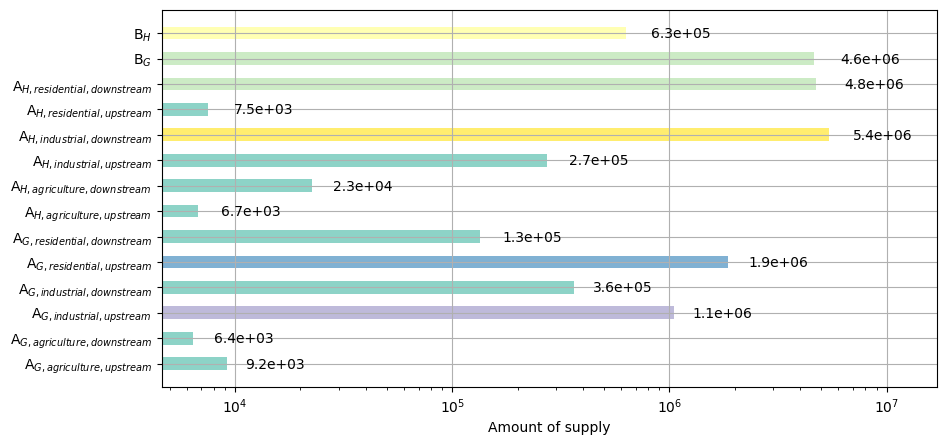

In [125]:
plt.figure(dpi=100,figsize=(10,5))
y=np.arange(1,15)
x=answer
str1=['A$_{G,agriculture,upstream}$','A$_{G,agriculture,downstream}$', 'A$_{G,industrial,upstream}$','A$_{G,industrial,downstream}$','A$_{G,residential,upstream}$', 'A$_{G,residential,downstream}$','A$_{H,agriculture,upstream}$','A$_{H,agriculture,downstream}$', 'A$_{H,industrial,upstream}$','A$_{H,industrial,downstream}$','A$_{H,residential,upstream}$', 'A$_{H,residential,downstream}$',  'B$_{G}$', 'B$_{H}$']

plt.xscale('log')

data_color = answer

data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('Set3')

colors = my_cmap(data_color)

rects1 = plt.bar(x=0, bottom=y, color=colors,height=0.5,width=x,orientation="horizontal",tick_label=str1)

plt.text(answer[0]+0.6e+04, 1-0.3 , '9.2e+03', ha='center', va='bottom', fontsize=10)
plt.text(answer[1]+0.45e+04, 2-0.3 , '6.4e+03', ha='center', va='bottom', fontsize=10)
plt.text(answer[2]+0.7e+06, 3-0.3 , '1.1e+06', ha='center', va='bottom', fontsize=10)
plt.text(answer[3]+2.5e+05, 4-0.3 , '3.6e+05', ha='center', va='bottom', fontsize=10)
plt.text(answer[4]+1.3e+06, 5-0.3 , '1.9e+06', ha='center', va='bottom', fontsize=10)
plt.text(answer[5]+1.0e+05, 6-0.3 , '1.3e+05', ha='center', va='bottom', fontsize=10)
plt.text(answer[6]+5.1e+03, 7-0.3 , '6.7e+03', ha='center', va='bottom', fontsize=10)
plt.text(answer[7]+1.6e+04, 8-0.3 , '2.3e+04', ha='center', va='bottom', fontsize=10)
plt.text(answer[8]+2.0e+05, 9-0.3 , '2.7e+05', ha='center', va='bottom', fontsize=10)
plt.text(answer[9]+4.2e+06, 10-0.3 , '5.4e+06', ha='center', va='bottom', fontsize=10)
plt.text(answer[10]+0.6e+04, 11-0.3 , '7.5e+03', ha='center', va='bottom', fontsize=10)
plt.text(answer[11]+4.0e+06, 12-0.3 , '4.8e+06', ha='center', va='bottom', fontsize=10)
plt.text(answer[12]+3.8e+06, 13-0.3 , '4.6e+06', ha='center', va='bottom', fontsize=10)
plt.text(answer[13]+5e+05, 14-0.3 , '6.3e+05', ha='center', va='bottom', fontsize=10)
    
plt.xlabel('Amount of supply ()')
plt.xlim(0, 1.7e+07)
plt.grid()
plt.show()